In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
df = pd.read_csv('Telco.csv')
#first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [6]:
#Separating churn and non churn customers
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [7]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:
df[cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [9]:
df["gender"].unique().tolist()

['Female', 'Male']

In [7]:
for i in cat_cols:
    print(df[i].unique(),i) 

['Female' 'Male'] gender
[0 1] SeniorCitizen
['Yes' 'No'] Partner
['No' 'Yes'] Dependents
['No' 'Yes'] PhoneService
['No phone service' 'No' 'Yes'] MultipleLines
['DSL' 'Fiber optic' 'No'] InternetService
['No' 'Yes' 'No internet service'] OnlineSecurity
['Yes' 'No' 'No internet service'] OnlineBackup
['No' 'Yes' 'No internet service'] DeviceProtection
['No' 'Yes' 'No internet service'] TechSupport
['No' 'Yes' 'No internet service'] StreamingTV
['No' 'Yes' 'No internet service'] StreamingMovies
['Month-to-month' 'One year' 'Two year'] Contract
['Yes' 'No'] PaperlessBilling
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] PaymentMethod


In [11]:
#replace 'No internet service' to No for the following columns
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

#### EDA

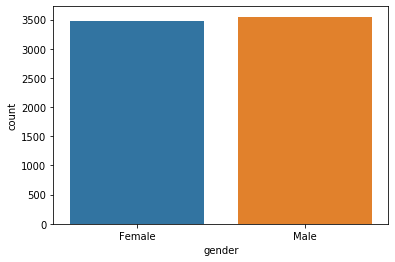

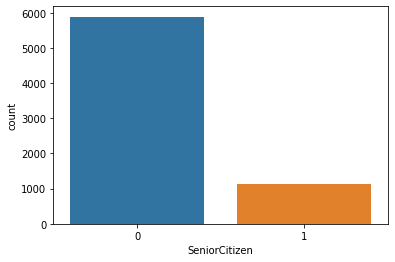

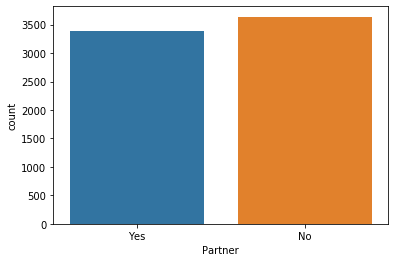

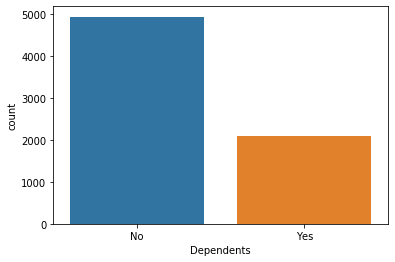

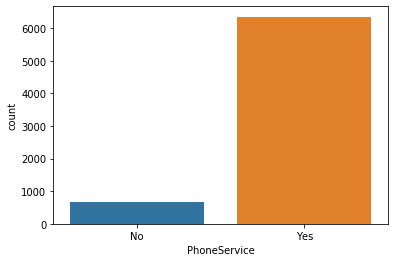

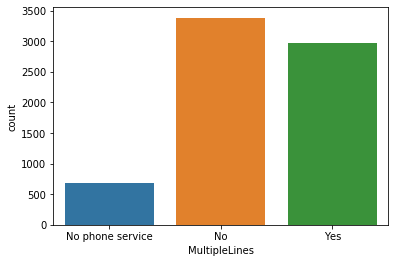

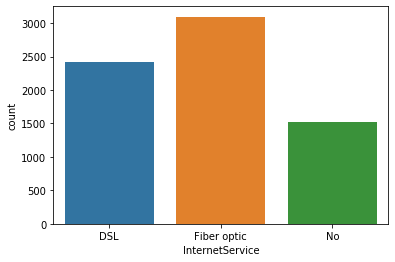

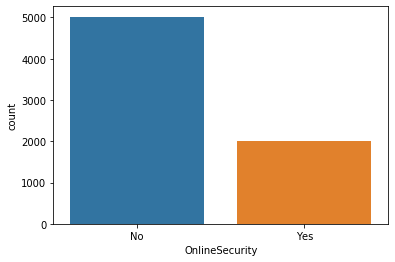

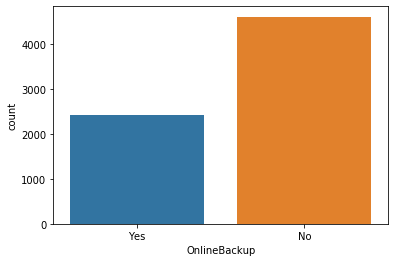

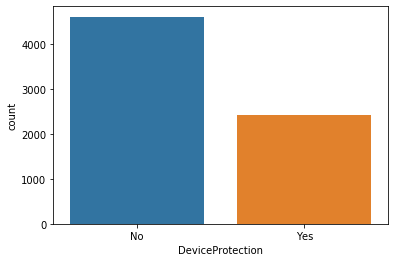

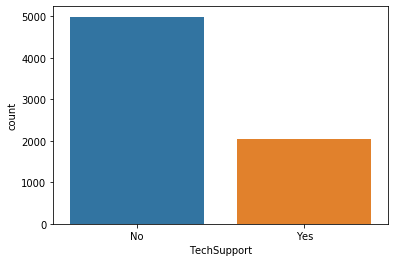

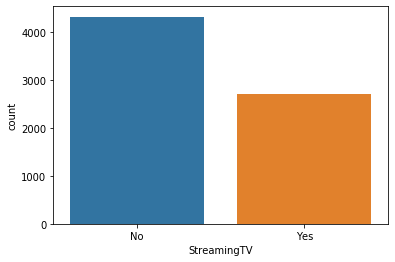

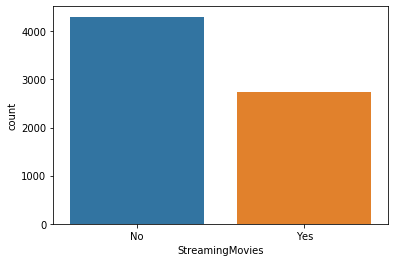

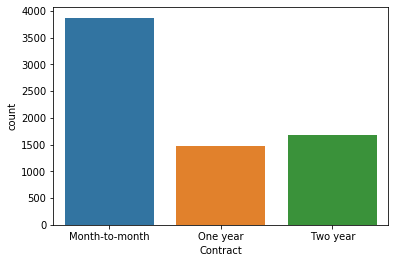

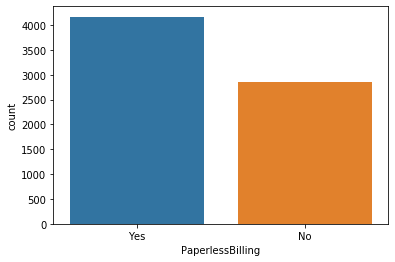

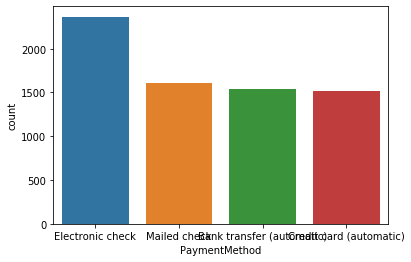

In [12]:
for i in cat_cols:
    sns.countplot(x=i,data=df)
    plt.show()

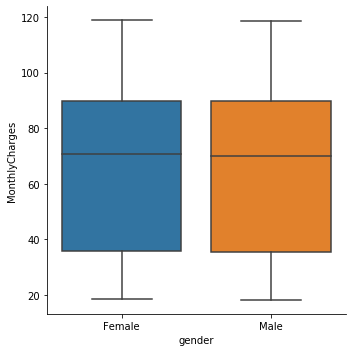

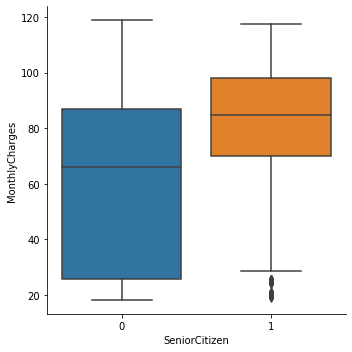

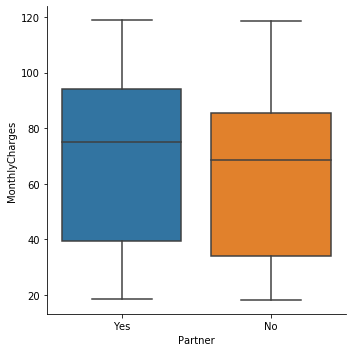

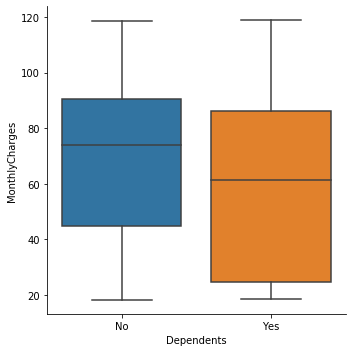

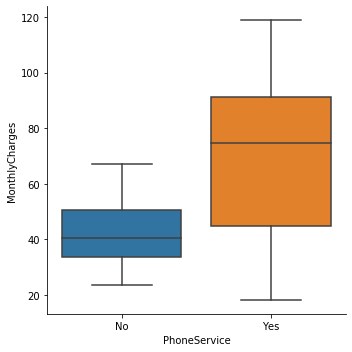

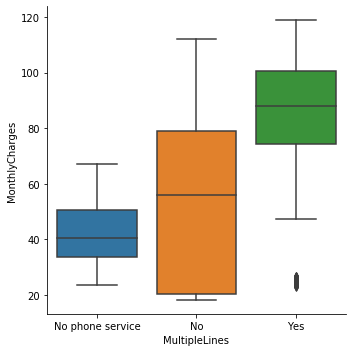

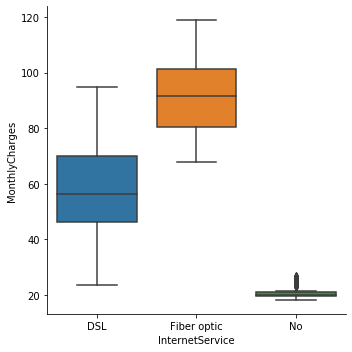

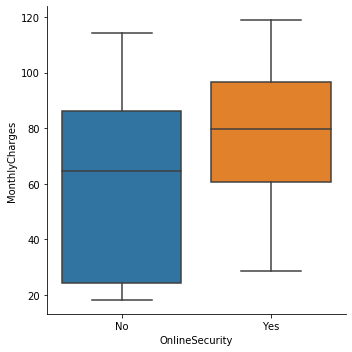

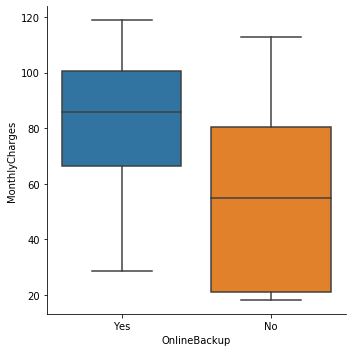

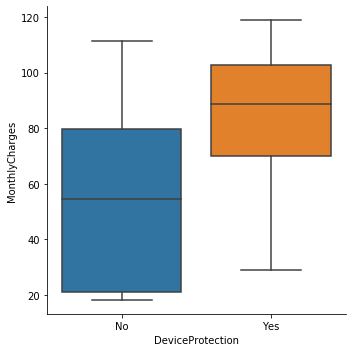

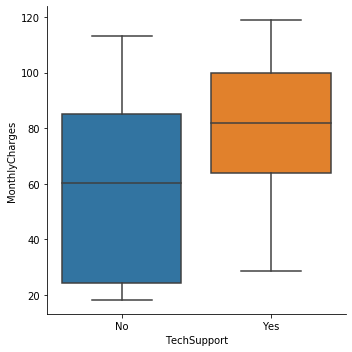

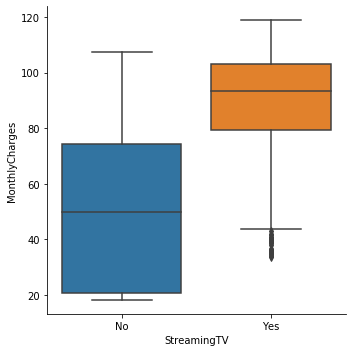

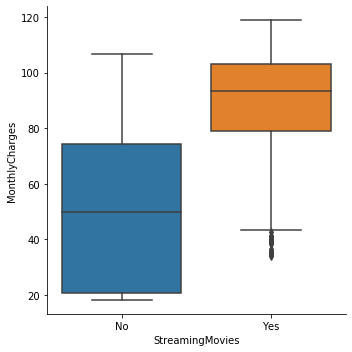

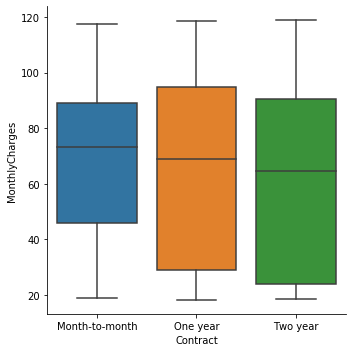

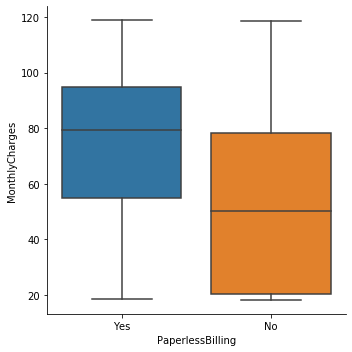

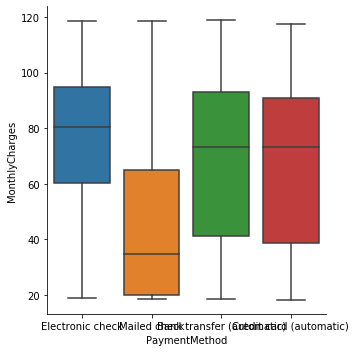

In [36]:
for i in cat_cols:
    sns.catplot(x=i,y="MonthlyCharges",kind="box",data=df)
    plt.show()

In [13]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7027     1990.5
7028     7362.9
7029     346.45
7030      306.6
7031     6844.5
Name: TotalCharges, Length: 7032, dtype: object

In [14]:
df[num_cols]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.5
7028,72,103.20,7362.9
7029,11,29.60,346.45
7030,4,74.40,306.6


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
for i in cat_cols:
    print(df[i].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
No     4992
Yes    2040
Name: TechSupport, dtype: int64
No     4329
Yes    2703
Name: StreamingTV, dtype: int64
No     4301
Yes    2731
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
Electronic c

In [17]:
df[cat_cols].shape

(7032, 16)

In [18]:
df[num_cols].shape

(7032, 3)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [10]:
df.drop('customerID',axis=1,inplace=True)

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [13]:
scaler = StandardScaler()
scaler.fit(X[num_cols])
X[num_cols]=scaler.transform(X[num_cols])

In [14]:
X = pd.get_dummies(columns=cat_cols,data=X,drop_first=True)

In [15]:
y = pd.get_dummies(columns='Churn',data=y,drop_first=True)

### Model Building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [18]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [29]:
y_pred=lg.predict(X_test)

In [33]:
y_pred = lg.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = lg.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.8071921982933766
Accuracy for Test set:
0.8071090047393364


Recall for Train set:
0.5189058728881738
Recall for Test set:
0.5431309904153354


Precision for Train set:
0.6475903614457831
Precision for Test set:
0.737527114967462


F1 Score for Test set:
0.6255749770009199


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators=100,max_depth=15)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = clf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = clf.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.9916700528240553
Accuracy for Test set:
0.781042654028436


Recall for Train set:
0.9823008849557522
Recall for Test set:
0.46325878594249204


Precision for Train set:
0.9846774193548387
Precision for Test set:
0.6971153846153846


F1 Score for Test set:
0.5566218809980806


In [37]:
from xgboost import XGBClassifier

In [38]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Wall time: 3.65 s
0.8


In [39]:
y_pred = XGB_model.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = XGB_model.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.8451848841934173
Accuracy for Test set:
0.8


Recall for Train set:
0.587288817377313
Recall for Test set:
0.5111821086261981


Precision for Train set:
0.745658835546476
Precision for Test set:
0.7339449541284404


F1 Score for Test set:
0.6026365348399246


#### SMOTE

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
os =  RandomOverSampler()

In [22]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [23]:
y_train_res.value_counts()

Yes    5163
No     5163
Name: Churn, dtype: int64

In [24]:
scaler = StandardScaler()
scaler.fit(X_train_res[num_cols])
X_train_res[num_cols]=scaler.transform(X_train_res[num_cols])

In [25]:
X_train_res = pd.get_dummies(columns=cat_cols,data=X_train_res,drop_first=True)

In [26]:
y_train_res = pd.get_dummies(columns='Churn',data=y_train_res,drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3, random_state = 123)

In [129]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [55]:
y_pred = lg.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = lg.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.6999169894853348
Accuracy for Test set:
0.684312459651388


Recall for Train set:
0.4605079542283003
Recall for Test set:
0.4518987341772152


Precision for Train set:
0.8748674443266172
Precision for Test set:
0.864406779661017


F1 Score for Test set:
0.5935162094763092


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf = RandomForestClassifier(n_estimators=100,max_depth=15)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = clf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = clf.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Train set:")
print(f1_score(y_train,y_pred))

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.9757885998893193
Accuracy for Test set:
0.8808908973531311


Recall for Train set:
0.9988836170806586
Recall for Test set:
0.9468354430379747


Precision for Train set:
0.9544
Precision for Test set:
0.8399775407074677


F1 Score for Train set:
0.9761352788763126
F1 Score for Test set:
0.890211246652782


In [33]:
from xgboost import XGBClassifier

In [34]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Wall time: 5.72 s
0.802775984506133


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = XGB_model.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = XGB_model.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.8497509684560044
Accuracy for Test set:
0.802775984506133


Recall for Train set:
0.8900362824448786
Recall for Test set:
0.8525316455696202


Precision for Train set:
0.821695439319763
Precision for Test set:
0.7808695652173913


F1 Score for Test set:
0.8151285930408472


### Conclusions and Saving the model using pickle

In [80]:
##### After oversampling the data because of class imbalance random forest gives the
##### best results on the test set hence I saved that model

In [82]:
import pickle

In [85]:
filename = 'Telecom_churn_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [86]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8792769528728211
